In [1]:
# importer les jeux de données
import pandas as pd
import random
import os
ppi = pd.read_csv('Decagon/data/ppi/bio-decagon-ppi.csv') # lien entre protéines
pmi = pd.read_csv('Decagon/data/cible/bio-decagon-targets.csv') # cible des médicaments
combo = pd.read_csv('Decagon/data/combo/bio-decagon-combo.csv') # effet de deux médicaments
typ = pd.read_csv('Decagon/data/type/bio-decagon-effectcategories.csv') # type effet secondaire
mono = pd.read_csv('Decagon/data/mono/bio-decagon-mono.csv') # effet secondaire d'un médicament
pmi[["STITCH", "Gene"]] = pmi["STITCH;Gene"].str.split(";", expand=True)
pmi = pmi.drop(columns=["STITCH;Gene"])

# On fait des listes générales pour la suite

# on choisi les effet secondaire en lien avec le cancer
Cancer=typ.loc[typ.iloc[:, 2] == "cancer",:]
Cancer=Cancer.iloc[:, 0].tolist() 
CD = [] # contient toutes les drogues avec un effet secondaire de type cancer
for i in range(len(combo)):
    if combo.iloc[i, 2] in Cancer: 
        gene1 = combo.iloc[i, 1]
        gene2 = combo.iloc[i, 0]
        
        if gene1 not in CD:
            CD.append(gene1)
        if gene2 not in CD:
            CD.append(gene2)

# Toutes les drogues du dataset
Drugs = [] 
for drug in combo.iloc[:, 0].tolist()+combo.iloc[:, 1].tolist():
    if drug not in Drugs:
        Drugs.append(drug)
len(Drugs)

# liste de couple de toutes les protéines
couple=[] # tous les couples intéractions prot prot
for i in range(len(ppi)):
    gene1=int(ppi.iloc[i, 0])
    gene2=int(ppi.iloc[i, 1])
    couple.append((gene1,gene2))
# on a 715612 lien entre protéines

!pip install networkx matplotlib
import networkx as nx
import matplotlib.pyplot as plt

# liste de couple de toutes les drogues
cd=[] # liste de tous les couple de drogue en interaction
for i in range(len(combo)):
    gene1=combo.iloc[i, 0]
    gene2=combo.iloc[i, 1]
    cd.append((gene1,gene2))
# on a 715612 lien entre protéines

In [2]:
# Récupère les données pour 50 choix aléatoires

PNodes = PEdges = PDensity = PAVG = PMin = PMax = 0
DNodes = DEdges = DAVG = DMin = DMax =DDensity= 0
CNodes = CEdges = CAVG = CMin = CMax =CDensity= 0
GNodes = GEdges = GAVG = GMin = GMax =GDensity= 0
N=50
for i in range(N):
    print(i)
    Drugs_copy = CD.copy() # si condition cancer# si condition aléatoire
    random.shuffle(Drugs_copy)        # Mélange aléatoire
    D10 = Drugs_copy[:10] # séléctionne 10 drogues avec un effet combiné type cancer
    mask = [D in D10 for D in pmi.iloc[:,0]] 
    P10 = pmi[mask] # true si la ligne contient un drogue de D10
# récupère les liens entre les protéines liées à ces 60 drogues
    Prot = [] # toutes les protéines en intéraction directe avec une drogue
    for prot in P10.iloc[:,1]:
        if prot not in Prot:
            Prot.append(int(prot))
# Prot avec toutes les protéines connectées aux 60 drogues
# graphe avec les protéines des 60 drogues
    PPI10=[] # couples de protéines en interaction
    for ppi1 in couple:
        if ppi1[0] in Prot and ppi1[1] in Prot:
            PPI10.append((ppi1[0],ppi1[1]))
    # on defini un graph avec les interactions protéines-protéines et les protéines en interactions avec que des protéines ciblées par drugs d'intérêt
    PPI = nx.Graph()
    PPI.add_edges_from(PPI10) # arète si intéraction entre prot
    PPI.add_nodes_from(Prot) # les protéines qui n'intéragissent pas 
# prop du graphe 
    n_nodes = PPI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = PPI.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(PPI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in PPI.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    PNodes += n_nodes
    PEdges += n_edges
    PDensity+=density
    PAVG += avg_degree
    PMin += min_degree
    PMax += max_degree
# on prélève le nombre de protéines selon les drogues choisies
    DI10=[] # couple de drogues en intéraction 
    for gene in cd:
        if gene[0] in D10 and gene[1] in D10:
            if ((gene[0],gene[1])) not in DI10:
                DI10.append((gene[0],gene[1]))
# on prélève le nombre de protéines selon les drogues choisies
# on defini un graph
    DI = nx.Graph()
    DI.add_edges_from(DI10)
    DI.add_nodes_from(D10)
# prop du graphe 
    n_nodes = DI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = DI.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(DI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in DI.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    DNodes+=n_nodes
    DEdges+=n_edges
    DDensity+=density
    DAVG+=avg_degree
    DMin+=min_degree
    DMax+=max_degree
# represente les liens entre drogues et proteines
    PC=[] # intéraction protéine et drogue
    for i in range(len(P10)):
        prot=int(P10.iloc[i,1])
        drogue=P10.iloc[i,0]
        PC.append((drogue,prot))
# on defini un graph
    PC_graph = nx.Graph()
    PC_graph.add_edges_from(PC) 
# prop du graphe 
    n_nodes = PC_graph.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = PC_graph.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(PC_graph) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in PC_graph.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    CNodes+=n_nodes
    CEdges+=n_edges
    CDensity+=density
    CAVG+=avg_degree
    CMin+=min_degree
    CMax+=max_degree
    # graphe combiné
    G = nx.Graph()
    G.add_edges_from(PPI.edges())
    G.add_edges_from(DI.edges())
    G.add_edges_from(PC_graph.edges()) 
# prop du graphe 
    n_nodes = G.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = G.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(G) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in G.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    GNodes+=n_nodes
    GEdges+=n_edges
    GDensity+=density
    GAVG+=avg_degree
    GMin+=min_degree
    GMax+=max_degree

PNodes /= N; PEdges /= N; PDensity /= N; PAVG /= N; PMin /= N; PMax /= N
DNodes /= N; DEdges /= N; DDensity /= N; DAVG /= N; DMin /= N; DMax /= N
CNodes /= N; CEdges /= N; CDensity /= N; CAVG /= N; CMin /= N; CMax /= N
GNodes /= N; GEdges /= N; GDensity /= N; GAVG /= N; GMin /= N; GMax /= N

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [3]:
# Récupère des données aléatoires

PNodes1 = PEdges1 = PDensity1 = PAVG1 = PMin1 = PMax1 = 0
DNodes1 = DEdges1 = DAVG1 = DMin1 = DMax1 =DDensity1= 0
CNodes1 = CEdges1 = CAVG1 = CMin1 = CMax1 =CDensity1= 0
GNodes1 = GEdges1 = GAVG1 = GMin1 = GMax1 =GDensity1= 0

N=50
for i in range(N):
    print(i)
    Drugs_copy = Drugs.copy()         # Pour ne pas modifier la liste d'origine
    random.shuffle(Drugs_copy)        # Mélange aléatoire
    D10 = Drugs_copy[:10] # séléctionne 10 drogues avec un effet combiné type cancer
    mask = [D in D10 for D in pmi.iloc[:,0]] 
    P10 = pmi[mask] # true si la ligne contient un drogue de D10
# récupère les liens entre les protéines liées à ces 60 drogues
    Prot = [] # toutes les protéines en intéraction directe avec une drogue
    for prot in P10.iloc[:,1]:
        if prot not in Prot:
            Prot.append(int(prot))
# Prot avec toutes les protéines connectées aux 60 drogues
# graphe avec les protéines des 60 drogues
    PPI10=[] # couples de protéines en interaction
    for ppi1 in couple:
        if ppi1[0] in Prot and ppi1[1] in Prot:
            PPI10.append((ppi1[0],ppi1[1]))
    # on defini un graph avec les interactions protéines-protéines et les protéines en interactions avec que des protéines ciblées par drugs d'intérêt
    PPI = nx.Graph()
    PPI.add_edges_from(PPI10) # arète si intéraction entre prot
    PPI.add_nodes_from(Prot) # les protéines qui n'intéragissent pas 
# prop du graphe 
    n_nodes = PPI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = PPI.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(PPI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in PPI.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    PNodes1 += n_nodes
    PEdges1 += n_edges
    PDensity1+=density
    PAVG1 += avg_degree
    PMin1 += min_degree
    PMax1 += max_degree
# on prélève le nombre de protéines selon les drogues choisies
    DI10=[] # couple de drogues en intéraction 
    for gene in cd:
        if gene[0] in D10 and gene[1] in D10:
            if ((gene[0],gene[1])) not in DI10:
                DI10.append((gene[0],gene[1]))
# on prélève le nombre de protéines selon les drogues choisies
# on defini un graph
    DI = nx.Graph()
    DI.add_edges_from(DI10)
    DI.add_nodes_from(D10)
# prop du graphe 
    n_nodes = DI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = DI.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(DI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in DI.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    DNodes1+=n_nodes
    DEdges1+=n_edges
    DDensity1+=density
    DAVG1+=avg_degree
    DMin1+=min_degree
    DMax1+=max_degree
# represente les liens entre drogues et proteines
    PC=[] # intéraction protéine et drogue
    for i in range(len(P10)):
        prot=int(P10.iloc[i,1])
        drogue=P10.iloc[i,0]
        PC.append((drogue,prot))
# on defini un graph
    PC_graph = nx.Graph()
    PC_graph.add_edges_from(PC) 
# prop du graphe 
    n_nodes = PC_graph.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = PC_graph.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(PC_graph) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in PC_graph.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    CNodes1+=n_nodes
    CEdges1+=n_edges
    CDensity1+=density
    CAVG1+=avg_degree
    CMin1+=min_degree
    CMax1+=max_degree
    # graphe combiné
    G = nx.Graph()
    G.add_edges_from(PPI.edges())
    G.add_edges_from(DI.edges())
    G.add_edges_from(PC_graph.edges()) 
# prop du graphe 
    n_nodes = G.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = G.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(G) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in G.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    GNodes1+=n_nodes
    GEdges1+=n_edges
    GDensity1+=density
    GAVG1+=avg_degree
    GMin1+=min_degree
    GMax1+=max_degree

PNodes1 /= N; PEdges1 /= N; PDensity1 /= N; PAVG1 /= N; PMin1 /= N; PMax1 /= N
DNodes1 /= N; DEdges1 /= N; DDensity1 /= N; DAVG1 /= N; DMin1 /= N; DMax1 /= N
CNodes1 /= N; CEdges1 /= N; CDensity1 /= N; CAVG1 /= N; CMin1 /= N; CMax1 /= N
GNodes1 /= N; GEdges1 /= N; GDensity1 /= N; GAVG1 /= N; GMin1 /= N; GMax1 /= N

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
# Récupère des données de barabasi si on suit les résultats obtenus par le modèle avec données cancer
PNodes1 = PEdges1 = PDensity1 = PAVG1 = PMin1 = PMax1 = 0
DNodes1 = DEdges1 = DAVG1 = DMin1 = DMax1 =DDensity1= 0
CNodes1 = CEdges1 = CAVG1 = CMin1 = CMax1 =CDensity1= 0
GNodes1 = GEdges1 = GAVG1 = GMin1 = GMax1 =GDensity1= 0
import networkx as nx
import matplotlib.pyplot as plt
N=50
for i in range(N):
    print(i)
    #Nombre de noeuds : 159
#Nombre d'arêtes : 2978
    n=PNodes
    E=PEdges
    m = int(E / n)
    PPI = nx.barabasi_albert_graph(n,m)
    # on defini un graph avec les interactions protéines-protéines et les protéines en interactions avec que des protéines ciblées par drugs d'intérêt
    n_nodes = PPI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = PPI.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(PPI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in PPI.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    PNodes1 += n_nodes
    PEdges1 += n_edges
    PDensity1+=density
    PAVG1 += avg_degree
    PMin1 += min_degree
    PMax1 += max_degree
    #Nombre de noeuds : 10
#Nombre d'arêtes : 25
    n=DNodes
    E=DEdges
    m = int(E / n)
    DI= nx.barabasi_albert_graph(n,m)
# on prélève le nombre de protéines selon les drogues choisies
# prop du graphe 
    n_nodes = DI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = DI.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(DI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in DI.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    DNodes1+=n_nodes
    DEdges1+=n_edges
    DDensity1+=density
    DAVG1+=avg_degree
    DMin1+=min_degree
    DMax1+=max_degree
# represente les liens entre drogues et proteines
    n=CNodes
    E=CEdges
    m = int(E / n)
    PC_graph= nx.barabasi_albert_graph(n,m)
    n_nodes = PC_graph.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = PC_graph.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(PC_graph) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in PC_graph.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    CNodes1+=n_nodes
    CEdges1+=n_edges
    CDensity1+=density
    CAVG1+=avg_degree
    CMin1+=min_degree
    CMax1+=max_degree
    # graphe combiné
    n=GNodes
    E=GEdges
    m = int(E / n)
    G= nx.barabasi_albert_graph(n,m) 
# prop du graphe 
    n_nodes = G.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = G.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(G) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in G.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    GNodes1+=n_nodes
    GEdges1+=n_edges
    GDensity1+=density
    GAVG1+=avg_degree
    GMin1+=min_degree
    GMax1+=max_degree

PNodes1 /= N; PEdges1 /= N; PDensity1 /= N; PAVG1 /= N; PMin1 /= N; PMax1 /= N
DNodes1 /= N; DEdges1 /= N; DDensity1 /= N; DAVG1 /= N; DMin1 /= N; DMax1 /= N
CNodes1 /= N; CEdges1 /= N; CDensity1 /= N; CAVG1 /= N; CMin1 /= N; CMax1 /= N
GNodes1 /= N; GEdges1 /= N; GDensity1 /= N; GAVG1 /= N; GMin1 /= N; GMax1 /= N

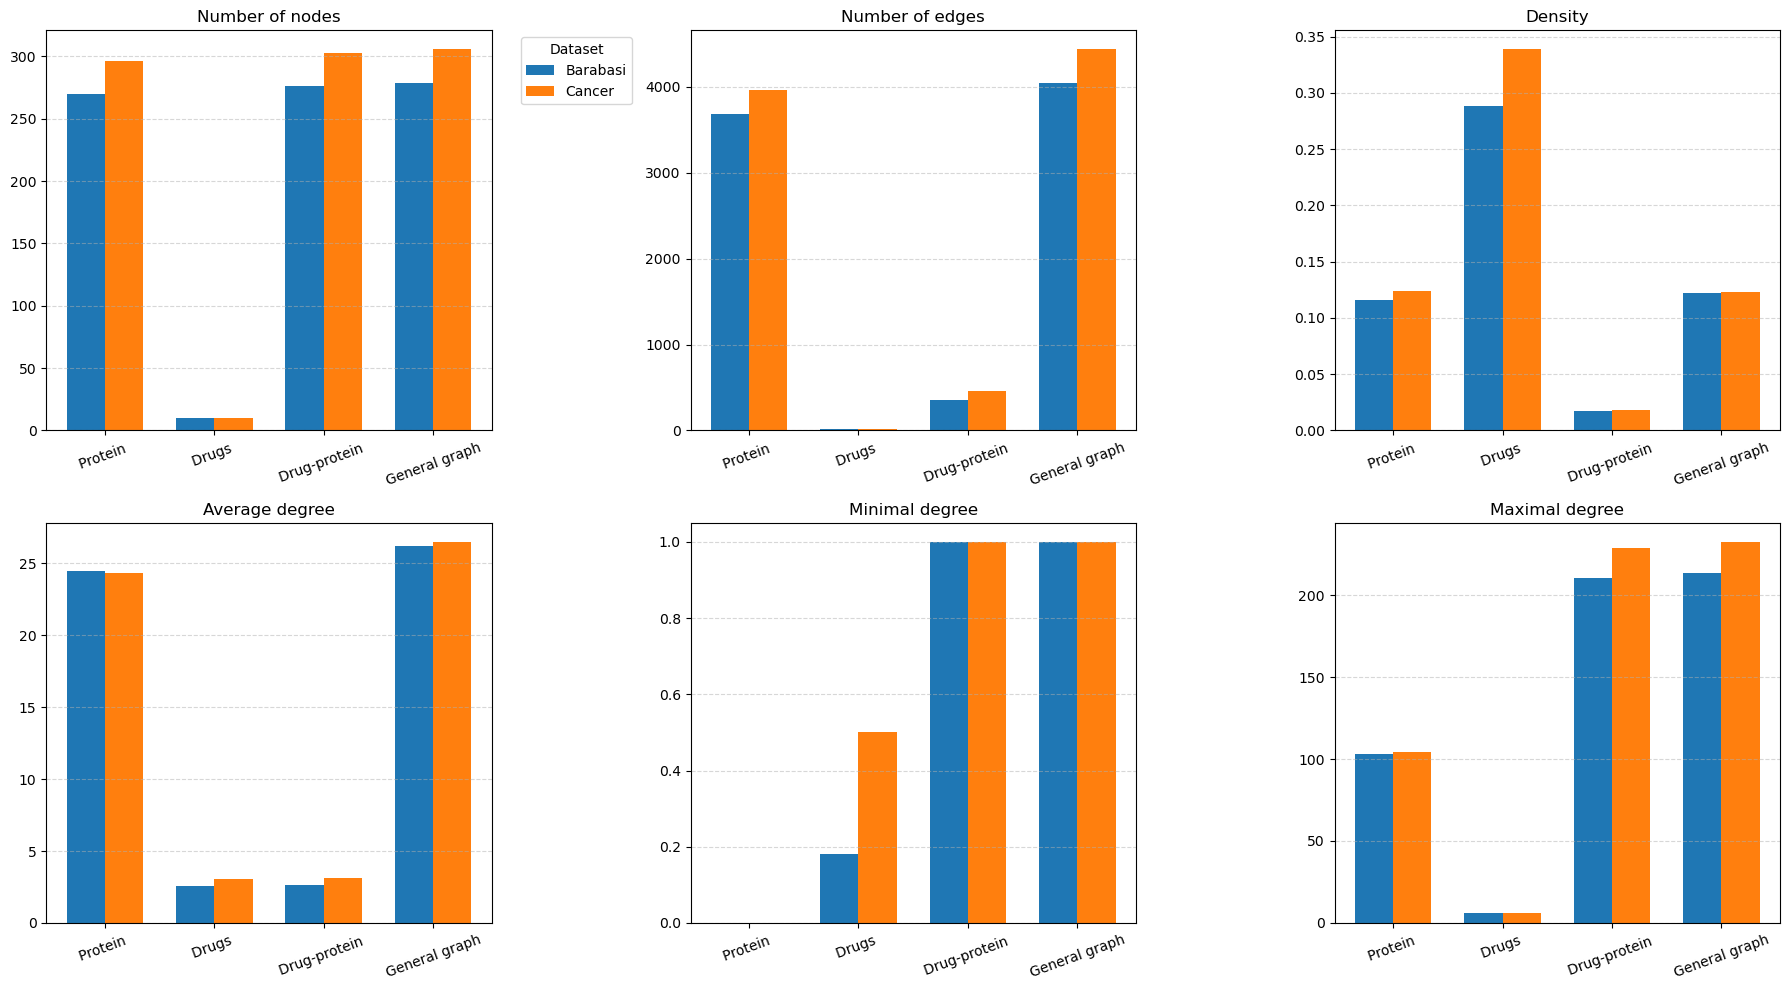

In [4]:
# Affiche les résultats en bar plots

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# --- Exemple de données : dataset 1 ---
data1 = {
    "Protein ": [PNodes1, PEdges1, PDensity1, PAVG1, PMin1, PMax1],
    "Drugs ": [DNodes1, DEdges1, DDensity1, DAVG1, DMin1, DMax1],
    "Drug-protein ": [CNodes1, CEdges1, CDensity1, CAVG1, CMin1, CMax1],
    "General graph": [GNodes1, GEdges1, GDensity1, GAVG1, GMin1, GMax1]
}

# --- Exemple de données : dataset 2 ---
data2 = {
    "Protein ": [PNodes, PEdges, PDensity, PAVG, PMin, PMax],
    "Drugs ": [DNodes, DEdges, DDensity, DAVG, DMin, DMax],
    "Drug-protein ": [CNodes, CEdges, CDensity, CAVG, CMin, CMax],
    "General graph": [GNodes, GEdges, GDensity, GAVG, GMin, GMax]
}

features = ["Number of nodes", "Number of edges", "Density", "Average degree", "Minimal degree", "Maximal degree"]
graph_types = ["Protein ", "Drugs ", "Drug-protein ", "General graph"]
# Créer deux DataFrames
df1 = pd.DataFrame(data1, index=features)
df2 = pd.DataFrame(data2, index=features)

# Ajouter un niveau pour distinguer les datasets
df1["Dataset"] = "Barabasi"
df2["Dataset"] = "Cancer"

# Fusionner les deux DataFrames
df_combined = pd.concat([df1, df2])

# Transformer en format long
long_data = df_combined.reset_index().melt(
    id_vars=["index", "Dataset"],
    value_vars=graph_types,
    var_name="Graph type",
    value_name="Value"
)
long_data.rename(columns={"index": "Feature"}, inplace=True)

# --- Plot ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
width = 0.35  # largeur des barres

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # couleurs pour les graph types

for i, feature in enumerate(features):
    ax = axes[i]
    df_plot = long_data[long_data["Feature"] == feature]
    
    x = np.arange(len(graph_types))  # position des groupes de barres
    for j, dataset in enumerate(["Barabasi", "Cancer"]):
        values = df_plot[df_plot["Dataset"] == dataset]["Value"].values
        ax.bar(x + j*width, values, width=width, label=dataset)
    
    ax.set_xticks(x + width/2)
    ax.set_xticklabels(graph_types, rotation=20)
    ax.set_title(feature)
    ax.grid(axis="y", linestyle="--", alpha=0.5)

axes[0].legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [5]:
# Analyse de co-occurence

# Hypertension
hyper = typ.loc[typ['Side Effect Name'] == "essential hypertension", 'Side Effect'].tolist()
H = []  # contient tous les couples de gènes pour hypertension

for i in range(len(combo)):
    if combo.iloc[i, 2] in hyper:
        gene1, gene2 = combo.iloc[i, 0], combo.iloc[i, 1]
        if (gene1, gene2) not in H:
            H.append((gene1, gene2))

# Anxiété
anxiety = combo.loc[combo['Side Effect Name'] == "Anxiety",'Polypharmacy Side Effect' ].tolist()
A = []

for i in range(len(combo)):
    if combo.iloc[i, 2] in anxiety:
        gene1, gene2 = combo.iloc[i, 0], combo.iloc[i, 1]
        if (gene1, gene2) not in A:
            A.append((gene1, gene2))

# Couples communs
AH = [pair for pair in A if pair in H]

# Pourcentage
pourcentage = len(AH) * 100 / len(H)
print(f"Pourcentage de couples communs : {pourcentage:.2f}%")

AHD=[]
for i in range(len(AH)):
    gene1, gene2 = AH[i][0], AH[i][1]
    if gene1 not in AHD :
        AHD.append(gene1)
    if gene2 not in AHD :
        AHD.append(gene2)

HD=[]
for i in range(len(H)):
    gene1, gene2 = H[i][0], H[i][1]
    if gene1 not in HD :
        HD.append(gene1)
    if gene2 not in HD :
        HD.append(gene2)

Pourcentage de couples communs : 60.66%


In [ ]:
# Propriétés de anxieté et hypertension

PNodes1 = PEdges1 = PDensity1 = PAVG1 = PMin1 = PMax1 = 0
DNodes1 = DEdges1 = DAVG1 = DMin1 = DMax1 =DDensity1= 0
CNodes1 = CEdges1 = CAVG1 = CMin1 = CMax1 =CDensity1= 0
GNodes1 = GEdges1 = GAVG1 = GMin1 = GMax1 =GDensity1= 0

N=50
for i in range(N):
    print(i)
    Drugs_copy = AHD.copy()         # Pour ne pas modifier la liste d'origine
    random.shuffle(Drugs_copy)        # Mélange aléatoire
    D10 = Drugs_copy[:10] # séléctionne 10 drogues avec un effet combiné type cancer
    mask = [D in D10 for D in pmi.iloc[:,0]] 
    P10 = pmi[mask] # true si la ligne contient un drogue de D10
# récupère les liens entre les protéines liées à ces 60 drogues
    Prot = [] # toutes les protéines en intéraction directe avec une drogue
    for prot in P10.iloc[:,1]:
        if prot not in Prot:
            Prot.append(int(prot))
# Prot avec toutes les protéines connectées aux 60 drogues
# graphe avec les protéines des 60 drogues
    PPI10=[] # couples de protéines en interaction
    for ppi1 in couple:
        if ppi1[0] in Prot and ppi1[1] in Prot:
            PPI10.append((ppi1[0],ppi1[1]))
    # on defini un graph avec les interactions protéines-protéines et les protéines en interactions avec que des protéines ciblées par drugs d'intérêt
    PPI = nx.Graph()
    PPI.add_edges_from(PPI10) # arète si intéraction entre prot
    PPI.add_nodes_from(Prot) # les protéines qui n'intéragissent pas 
# prop du graphe 
    n_nodes = PPI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = PPI.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(PPI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in PPI.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    PNodes1 += n_nodes
    PEdges1 += n_edges
    PDensity1+=density
    PAVG1 += avg_degree
    PMin1 += min_degree
    PMax1 += max_degree
# on prélève le nombre de protéines selon les drogues choisies
    DI10=[] # couple de drogues en intéraction 
    for gene in cd:
        if gene[0] in D10 and gene[1] in D10:
            if ((gene[0],gene[1])) not in DI10:
                DI10.append((gene[0],gene[1]))
# on prélève le nombre de protéines selon les drogues choisies
# on defini un graph
    DI = nx.Graph()
    DI.add_edges_from(DI10)
    DI.add_nodes_from(D10)
# prop du graphe 
    n_nodes = DI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = DI.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(DI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in DI.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    DNodes1+=n_nodes
    DEdges1+=n_edges
    DDensity1+=density
    DAVG1+=avg_degree
    DMin1+=min_degree
    DMax1+=max_degree
# represente les liens entre drogues et proteines
    PC=[] # intéraction protéine et drogue
    for i in range(len(P10)):
        prot=int(P10.iloc[i,1])
        drogue=P10.iloc[i,0]
        PC.append((drogue,prot))
# on defini un graph
    PC_graph = nx.Graph()
    PC_graph.add_edges_from(PC) 
# prop du graphe 
    n_nodes = PC_graph.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = PC_graph.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(PC_graph) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in PC_graph.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    CNodes1+=n_nodes
    CEdges1+=n_edges
    CDensity1+=density
    CAVG1+=avg_degree
    CMin1+=min_degree
    CMax1+=max_degree
    # graphe combiné
    G = nx.Graph()
    G.add_edges_from(PPI.edges())
    G.add_edges_from(DI.edges())
    G.add_edges_from(PC_graph.edges()) 
# prop du graphe 
    n_nodes = G.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = G.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(G) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in G.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    GNodes1+=n_nodes
    GEdges1+=n_edges
    GDensity1+=density
    GAVG1+=avg_degree
    GMin1+=min_degree
    GMax1+=max_degree

PNodes1 /= N; PEdges1 /= N; PDensity1 /= N; PAVG1 /= N; PMin1 /= N; PMax1 /= N
DNodes1 /= N; DEdges1 /= N; DDensity1 /= N; DAVG1 /= N; DMin1 /= N; DMax1 /= N
CNodes1 /= N; CEdges1 /= N; CDensity1 /= N; CAVG1 /= N; CMin1 /= N; CMax1 /= N
GNodes1 /= N; GEdges1 /= N; GDensity1 /= N; GAVG1 /= N; GMin1 /= N; GMax1 /= N

In [ ]:
# Propriété hypertension
PNodes = PEdges = PDensity = PAVG = PMin = PMax = 0
DNodes = DEdges = DAVG = DMin = DMax =DDensity= 0
CNodes = CEdges = CAVG = CMin = CMax =CDensity= 0
GNodes = GEdges = GAVG = GMin = GMax =GDensity= 0
N=50
for i in range(N):
    print(i)
    Drugs_copy = HD.copy()         # Pour ne pas modifier la liste d'origine
    random.shuffle(Drugs_copy)        # Mélange aléatoire
    D10 = Drugs_copy[:10] # séléctionne 10 drogues avec un effet combiné type cancer
    mask = [D in D10 for D in pmi.iloc[:,0]] 
    P10 = pmi[mask] # true si la ligne contient un drogue de D10
# récupère les liens entre les protéines liées à ces 60 drogues
    Prot = [] # toutes les protéines en intéraction directe avec une drogue
    for prot in P10.iloc[:,1]:
        if prot not in Prot:
            Prot.append(int(prot))
# Prot avec toutes les protéines connectées aux 60 drogues
# graphe avec les protéines des 60 drogues
    PPI10=[] # couples de protéines en interaction
    for ppi1 in couple:
        if ppi1[0] in Prot and ppi1[1] in Prot:
            PPI10.append((ppi1[0],ppi1[1]))
    # on defini un graph avec les interactions protéines-protéines et les protéines en interactions avec que des protéines ciblées par drugs d'intérêt
    PPI = nx.Graph()
    PPI.add_edges_from(PPI10) # arète si intéraction entre prot
    PPI.add_nodes_from(Prot) # les protéines qui n'intéragissent pas 
# prop du graphe 
    n_nodes = PPI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = PPI.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(PPI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in PPI.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    PNodes += n_nodes
    PEdges += n_edges
    PDensity+=density
    PAVG += avg_degree
    PMin += min_degree
    PMax += max_degree
# on prélève le nombre de protéines selon les drogues choisies
    DI10=[] # couple de drogues en intéraction 
    for gene in cd:
        if gene[0] in D10 and gene[1] in D10:
            if ((gene[0],gene[1])) not in DI10:
                DI10.append((gene[0],gene[1]))
# on prélève le nombre de protéines selon les drogues choisies
# on defini un graph
    DI = nx.Graph()
    DI.add_edges_from(DI10)
    DI.add_nodes_from(D10)
# prop du graphe 
    n_nodes = DI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = DI.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(DI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in DI.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    DNodes+=n_nodes
    DEdges+=n_edges
    DDensity+=density
    DAVG+=avg_degree
    DMin+=min_degree
    DMax+=max_degree
# represente les liens entre drogues et proteines
    PC=[] # intéraction protéine et drogue
    for i in range(len(P10)):
        prot=int(P10.iloc[i,1])
        drogue=P10.iloc[i,0]
        PC.append((drogue,prot))
# on defini un graph
    PC_graph = nx.Graph()
    PC_graph.add_edges_from(PC) 
# prop du graphe 
    n_nodes = PC_graph.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = PC_graph.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(PC_graph) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in PC_graph.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    CNodes+=n_nodes
    CEdges+=n_edges
    CDensity+=density
    CAVG+=avg_degree
    CMin+=min_degree
    CMax+=max_degree
    # graphe combiné
    G = nx.Graph()
    G.add_edges_from(PPI.edges())
    G.add_edges_from(DI.edges())
    G.add_edges_from(PC_graph.edges()) 
# prop du graphe 
    n_nodes = G.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
    n_edges = G.number_of_edges() # nombre d'arêtes len(PPI60)
    density = nx.density(G) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
    degrees = [d for n, d in G.degree()] # liste des degrées 
    avg_degree = sum(degrees) / n_nodes # degré moyen
    min_degree = min(degrees) # minumun de degré
    max_degree = max(degrees) # max de degré
    GNodes+=n_nodes
    GEdges+=n_edges
    GDensity+=density
    GAVG+=avg_degree
    GMin+=min_degree
    GMax+=max_degree

PNodes /= N; PEdges /= N; PDensity /= N; PAVG /= N; PMin /= N; PMax /= N
DNodes /= N; DEdges /= N; DDensity /= N; DAVG /= N; DMin /= N; DMax /= N
CNodes /= N; CEdges /= N; CDensity /= N; CAVG /= N; CMin /= N; CMax /= N
GNodes /= N; GEdges /= N; GDensity /= N; GAVG /= N; GMin /= N; GMax /= N

In [ ]:
# Affiche les barplots 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# --- Exemple de données : dataset 1 ---
data1 = {
    "Protein ": [PNodes1, PEdges1, PDensity1, PAVG1, PMin1, PMax1],
    "Drugs ": [DNodes1, DEdges1, DDensity1, DAVG1, DMin1, DMax1],
    "Drug-protein ": [CNodes1, CEdges1, CDensity1, CAVG1, CMin1, CMax1],
    "General graph": [GNodes1, GEdges1, GDensity1, GAVG1, GMin1, GMax1]
}

# --- Exemple de données : dataset 2 ---
data2 = {
    "Protein ": [PNodes, PEdges, PDensity, PAVG, PMin, PMax],
    "Drugs ": [DNodes, DEdges, DDensity, DAVG, DMin, DMax],
    "Drug-protein ": [CNodes, CEdges, CDensity, CAVG, CMin, CMax],
    "General graph": [GNodes, GEdges, GDensity, GAVG, GMin, GMax]
}

features = ["Number of nodes", "Number of edges", "Density", "Average degree", "Minimal degree", "Maximal degree"]
graph_types = ["Protein ", "Drugs ", "Drug-protein ", "General graph"]
# Créer deux DataFrames
df1 = pd.DataFrame(data1, index=features)
df2 = pd.DataFrame(data2, index=features)

# Ajouter un niveau pour distinguer les datasets
df1["Dataset"] = "Hypertension and anxiety"
df2["Dataset"] = "Hypertension"

# Fusionner les deux DataFrames
df_combined = pd.concat([df1, df2])

# Transformer en format long
long_data = df_combined.reset_index().melt(
    id_vars=["index", "Dataset"],
    value_vars=graph_types,
    var_name="Graph type",
    value_name="Value"
)
long_data.rename(columns={"index": "Feature"}, inplace=True)

# --- Plot ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
width = 0.35  # largeur des barres

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # couleurs pour les graph types

for i, feature in enumerate(features):
    ax = axes[i]
    df_plot = long_data[long_data["Feature"] == feature]
    
    x = np.arange(len(graph_types))  # position des groupes de barres
    for j, dataset in enumerate(["Hypertension and anxiety", "Hypertension"]):
        values = df_plot[df_plot["Dataset"] == dataset]["Value"].values
        ax.bar(x + j*width, values, width=width, label=dataset)
    
    ax.set_xticks(x + width/2)
    ax.set_xticklabels(graph_types, rotation=20)
    ax.set_title(feature)
    ax.grid(axis="y", linestyle="--", alpha=0.5)

axes[0].legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
# Affiche graph pour aléatoire
import random
#Drugs_copy = CD.copy()    
Drugs_copy = Drugs.copy()  # Pour ne pas modifier la liste d'origine
random.shuffle(Drugs_copy)        # Mélange aléatoire
D10 = Drugs_copy[:10] 
Drugs = [] # toutes les drogues du dataset
for drug in combo.iloc[:, 0].tolist()+combo.iloc[:, 1].tolist():
    if drug not in Drugs:
        Drugs.append(drug)
len(Drugs)
import random
# récupère les protéines liées à ces 60 drogues
mask = [D in D10 for D in pmi.iloc[:,0]] 
P10 = pmi[mask] # true si la ligne contient un drogue de D10
# récupère les liens entre les protéines liées à ces 60 drogues
Prot = [] # toutes les protéines en intéraction directe avec une drogue
for prot in P10.iloc[:,1]:
    if prot not in Prot:
        Prot.append(int(prot))
# Prot avec toutes les protéines connectées aux 60 drogues
# graphe avec les protéines des 60 drogues
PPI10=[] # couples de protéines en interaction
for ppi1 in couple:
    if ppi1[0] in Prot and ppi1[1] in Prot:
        PPI10.append((ppi1[0],ppi1[1]))
# on prélève le nombre de protéines selon les drogues choisies
# on defini un graph avec les interactions protéines-protéines et les protéines en interactions avec que des protéines ciblées par drugs d'intérêt
PPI = nx.Graph()
PPI.add_edges_from(PPI10) # arète si intéraction entre prot
PPI.add_nodes_from(Prot) # les protéines qui n'intéragissent pas 
# prop du graphe 
n_nodes = PPI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
n_edges = PPI.number_of_edges() # nombre d'arêtes len(PPI60)
density = nx.density(PPI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
degrees = [d for n, d in PPI.degree()] # liste des degrées 
avg_degree = sum(degrees) / n_nodes # degré moyen
min_degree = min(degrees) # minumun de degré
max_degree = max(degrees) # max de degré

print(f"Nombre de noeuds : {n_nodes}")
print(f"Nombre d'arêtes : {n_edges}")
print(f"Densité : {density:.6f}")
print(f"Degré moyen : {avg_degree:.2f}")
print(f"Degré min : {min_degree}")
print(f"Degré max : {max_degree}")
# trouve les noeuds isolés
isolés = [i for i in PPI.nodes() if PPI.degree(i) == 0] # protéines isolées
connectés = [i for i in PPI.nodes() if PPI.degree(i) != 0] # protéines non isolées
# affiche les liens entre protéines 
import numpy as np
plt.figure(figsize=(30,20))
pos = nx.spring_layout(PPI, seed=100)
offset = 0.2
for node in isolés:
    pos[node] = np.array([
        np.random.uniform(-offset, offset),
        np.random.uniform(-offset, offset)
    ])
# Dessiner les arêtes et les nœuds connectés
nx.draw_networkx_edges(PPI, pos, alpha=0.5)
nx.draw_networkx_nodes(PPI, pos, nodelist=connectés, node_color='lightblue', node_size=30,label='Proteins connected')

# Dessiner les nœuds isolés différemment
nx.draw_networkx_nodes(PPI, pos, nodelist=isolés, node_color='red', node_size=30, node_shape='s',label='Proteins isolated')
plt.legend(loc='upper left', fontsize=20)
plt.axis('off')
#nx.draw(PPI, pos, node_size=10, node_color='lightblue', edge_color='gray', with_labels=False)
plt.savefig("reseau_proteines.png", dpi=300, bbox_inches='tight') 
plt.show()
# graphe avec les protéines des 60 drogues
DI10=[] # couple de drogues en intéraction 
for gene in cd:
    if gene[0] in D10 and gene[1] in D10:
        if ((gene[0],gene[1])) not in DI10:
            DI10.append((gene[0],gene[1]))
# on prélève le nombre de protéines selon les drogues choisies
# prop du graphe 
n_nodes = DI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
n_edges = DI.number_of_edges() # nombre d'arêtes len(PPI60)
density = nx.density(DI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
degrees = [d for n, d in DI.degree()] # liste des degrées 
avg_degree = sum(degrees) / n_nodes # degré moyen
min_degree = min(degrees) # minumun de degré
max_degree = max(degrees) # max de degré

print(f"Nombre de noeuds : {n_nodes}")
print(f"Nombre d'arêtes : {n_edges}")
print(f"Densité : {density:.6f}")
print(f"Degré moyen : {avg_degree:.2f}")
print(f"Degré min : {min_degree}")
print(f"Degré max : {max_degree}")
# trouve les noeuds isolés
Disolés = [i for i in DI.nodes() if DI.degree(i) == 0]
Dconnectés = [i for i in DI.nodes() if DI.degree(i) != 0]
# affiche les liens entre protéines 
import numpy as np
plt.figure(figsize=(30,20))
pos = nx.spring_layout(DI, seed=100)
offset = 0.2
for node in Disolés:
    pos[node] = np.array([
        np.random.uniform(-offset, offset),
        np.random.uniform(-offset, offset)
    ])
# Dessiner les arêtes et les nœuds connectés
nx.draw_networkx_edges(DI, pos, alpha=0.3,label='Combined side effect')
nx.draw_networkx_nodes(DI, pos, nodelist=Dconnectés, node_color='blue', node_size=70,label='Drugs')

# Dessiner les nœuds isolés différemment
nx.draw_networkx_nodes(DI, pos, nodelist=Disolés, node_color='red', node_size=70, node_shape='s',label='Drugs without side effect ')
plt.legend(loc='upper left', fontsize=20)
plt.axis('off')
plt.savefig("reseau_proteines.png", dpi=300, bbox_inches='tight')
#nx.draw(PPI, pos, node_size=10, node_color='lightblue', edge_color='gray', with_labels=False)
plt.show()
# represente les liens entre drogues et proteines
PC=[] # intéraction protéine et drogue
for i in range(len(P10)):
    prot=int(P10.iloc[i,1])
    drogue=P10.iloc[i,0]
    PC.append((drogue,prot))
len(PC)
# on defini un graph
PC_graph = nx.Graph()
PC_graph.add_edges_from(PC) 
len(PC)
Dprot = [ int(P10.iloc[i,1]) for i in range(len(P10))]
Ddrog = [ P10.iloc[i,0] for i in range(len(P10))]
# prop du graphe 
n_nodes = PC_graph.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
n_edges = PC_graph.number_of_edges() # nombre d'arêtes len(PPI60)
density = nx.density(PC_graph) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
degrees = [d for n, d in PC_graph.degree()] # liste des degrées 
avg_degree = sum(degrees) / n_nodes # degré moyen
min_degree = min(degrees) # minumun de degré
max_degree = max(degrees) # max de degré

print(f"Nombre de noeuds : {n_nodes}")
print(f"Nombre d'arêtes : {n_edges}")
print(f"Densité : {density:.6f}")
print(f"Degré moyen : {avg_degree:.2f}")
print(f"Degré min : {min_degree}")
print(f"Degré max : {max_degree}")
# affiche les liens entre protéines 
import numpy as np
# 2. Calculer la position des nœuds
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(PC_graph, seed=100)

# 3. Dessiner le graphe
nx.draw_networkx_edges(PC_graph, pos, alpha=0.3,label='Drug-protein interaction')
nx.draw_networkx_nodes(PC_graph, pos, nodelist=Dprot, node_color='blue', node_size=1,label='Proteins')

# Dessiner les nœuds isolés différemment
nx.draw_networkx_nodes(PC_graph, pos, nodelist=Ddrog, node_color='red', node_size=2, node_shape='s',label='Drugs  ')
plt.legend(loc='upper left', fontsize=10)
plt.savefig("reseau_proteines.png", dpi=300, bbox_inches='tight')
plt.show()
# graphe combiné
G = nx.Graph()
G.add_edges_from(PPI.edges())
G.add_edges_from(DI.edges())
G.add_edges_from(PC_graph.edges()) 
# prop du graphe 
n_nodes = G.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
n_edges = G.number_of_edges() # nombre d'arêtes len(PPI60)
density = nx.density(G) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
degrees = [d for n, d in G.degree()] # liste des degrées 
avg_degree = sum(degrees) / n_nodes # degré moyen
min_degree = min(degrees) # minumun de degré
max_degree = max(degrees) # max de degré

print(f"Nombre de noeuds : {n_nodes}")
print(f"Nombre d'arêtes : {n_edges}")
print(f"Densité : {density:.6f}")
print(f"Degré moyen : {avg_degree:.2f}")
print(f"Degré min : {min_degree}")
print(f"Degré max : {max_degree}")
import numpy as np
plt.figure(figsize=(30,20))
pos = nx.spring_layout(G, seed=100)
offset = 0.2
for node in isolés:
    pos[node] = np.array([
        np.random.uniform(-offset, offset),
        np.random.uniform(-offset, offset)
    ])
for node in Disolés:
    pos[node] = np.array([
        np.random.uniform(-offset, offset),
        np.random.uniform(-offset, offset)
    ])
# Dessiner les arêtes et les nœuds connectés

nx.draw_networkx_nodes(G, pos, nodelist=Dconnectés, node_color='blue', node_size=20,label='Drugs') # drogues avec combinaison en bleu

# Dessiner les nœuds isolés différemment
nx.draw_networkx_nodes(G, pos, nodelist=Disolés, node_color='green', node_size=20, node_shape='s',label='Drugs without combination  ') # drogues isolées en bleu clair
# Dessiner les arêtes et les nœuds connectés
nx.draw_networkx_edges(PPI, pos, alpha=0.3,label='Protein interaction')
nx.draw_networkx_nodes(G, pos, nodelist=connectés, node_color='purple', node_size=20,label='Proteins connected  ') # ppi connecté en violet

# Dessiner les nœuds isolés différemment
nx.draw_networkx_nodes(G, pos, nodelist=isolés, node_color='red', node_size=20, node_shape='s',label='Proteins isolated  ') # ppi isolé en rouge
nx.draw_networkx_edges(PC_graph, pos, edge_color='green', alpha=0.5, style='dashed',label='Protein-drug interaction ') #lien entre drogues et proteines en vert
nx.draw_networkx_edges(DI, pos, edge_color='red', alpha=0.5, style='dashed',label='Drugs interaction ') # lien entre drogues
plt.axis('off')
#nx.draw(PPI, pos, node_size=10, node_color='lightblue', edge_color='gray', with_labels=False)
plt.legend(loc='upper right', fontsize=20)
plt.savefig("reseau_proteines.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Analyse des données 
T = []

for i in range(len(typ)):
    maladie = typ.iloc[i, 2]
    
    # Vérifier si on a déjà traité cette maladie
    if maladie not in [x[0] for x in T]:
        effets = typ[typ.iloc[:, 2] == maladie].iloc[:, 0].tolist()
        T.append((maladie, effets))
 # contient toutes les drogues avec un effet secondaire de type cancer

U = []

for i in range(len(T)):
    M = T[i][0]  
    print(M)# maladie
    D = T[i][1]   # liste d'effets secondaires
    CD = []       # liste de gènes associés

    for p in range(len(combo)):
        if combo.iloc[p, 2] in D: 
            gene1 = combo.iloc[p, 1]
            gene2 = combo.iloc[p, 0]
            
            if gene1 not in CD:
                CD.append(gene1)
            if gene2 not in CD:
                CD.append(gene2)
                
    U.append((M, CD))

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Données à tracer
Tot = [len(genes) for _, genes in U]
label = [maladie for maladie, _ in U]

# Calcul de la moyenne
moyenne = np.mean(Tot)

# Définir les couleurs : rouge si en dessous de la moyenne, violet clair sinon
colors = ['plum' if val < moyenne else 'lightblue' for val in Tot]

# Figure
plt.figure(figsize=(10, 8))
plt.barh(label, Tot, color=colors)

# Légende personnalisée
legend_elements = [Patch(facecolor='plum', label='Underrepresented'),
                   Patch(facecolor='lightblue', label='Overrepresented')]
plt.legend(handles=legend_elements, loc='upper right')

plt.title("Number of gene pairs per disease")
plt.tight_layout()
plt.show()